# Análise Exploratória de Dados e Modelagem de Propensão

## Objetivo da Aula

- Compreender a importância da Análise Exploratória de Dados no processo de Data Science.
- Aprender técnicas e ferramentas para realizar a AED eficazmente.
- Construir e avaliar um modelo de propensão.


## 1. Introdução à Análise Exploratória de Dados (AED)

### O que é AED?

A Análise Exploratória de Dados (AED) é o processo de análise de conjuntos de dados para resumir suas principais características, muitas vezes utilizando métodos visuais. Ela ajuda a entender melhor os dados, descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas sumárias e representações gráficas.

### Objetivos da AED

- Compreender a distribuição dos dados.
- Identificar padrões, outliers, e anomalias.
- Formular hipóteses para análises posteriores.


## 2. Ferramentas e Bibliotecas para AED

### Bibliotecas Python

- **Pandas**: Manipulação e análise de dados.
- **Matplotlib/Seaborn**: Visualização de dados.
- **NumPy**: Operações numéricas.
- **Scipy**: Estatísticas e cálculos matemáticos.
- **Scikit-learn**: Modelagem e avaliação de modelos.

Vamos começar instalando e importando as bibliotecas necessárias.


In [ ]:
# Instalação de Bibliotecas
# !pip install "pandas<2.0.0" matplotlib seaborn "numpy<2.0.0" scipy scikit-learn

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

sns.set_style()

## 3. Carregando e Entendendo os Dados

Vamos usar o famoso dataset do Titanic para realizar a Análise Exploratória de Dados. Este dataset contém informações sobre os passageiros do Titanic, incluindo se eles sobreviveram ou não.


As colunas do dataset do Titanic são as seguintes:

- **PassengerId**: Identificador único de cada passageiro.
- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe em que o passageiro viajava (1ª, 2ª ou 3ª classe).
- **Name**: Nome do passageiro.
- **Sex**: Gênero do passageiro (masculino ou feminino).
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do ticket do passageiro.
- **Fare**: Valor da tarifa paga pelo passageiro.
- **Cabin**: Número da cabine do passageiro.
- **Embarked**: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).


In [3]:
# Carregar um dataset de exemplo
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

In [5]:
# Visualizar as primeiras linhas do dataset
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [8]:
# Obter informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Estatísticas descritivas do dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.sort_values(["Fare"], ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


## 4. Análise Univariada

A análise univariada envolve a análise de uma única variável. Vamos explorar a distribuição da idade dos passageiros e identificar outliers.


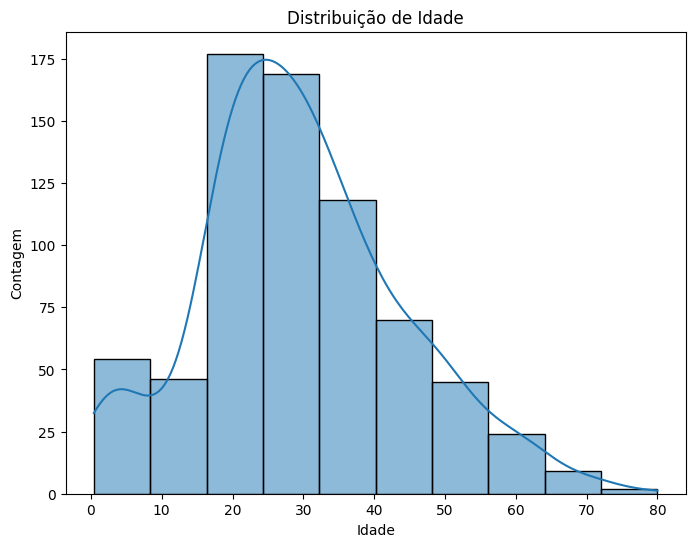

In [11]:
# Histograma da idade dos passageiros
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"].dropna(), bins=10, kde=True)
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

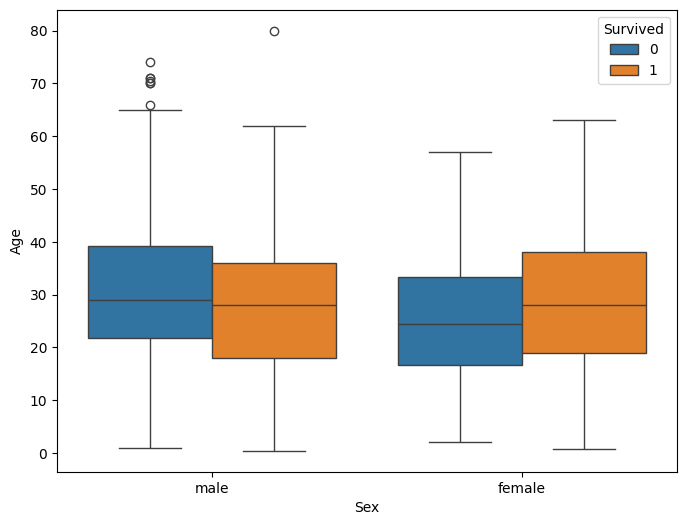

In [12]:
# Boxplot para visualizar outliers na idade
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df)
plt.show()

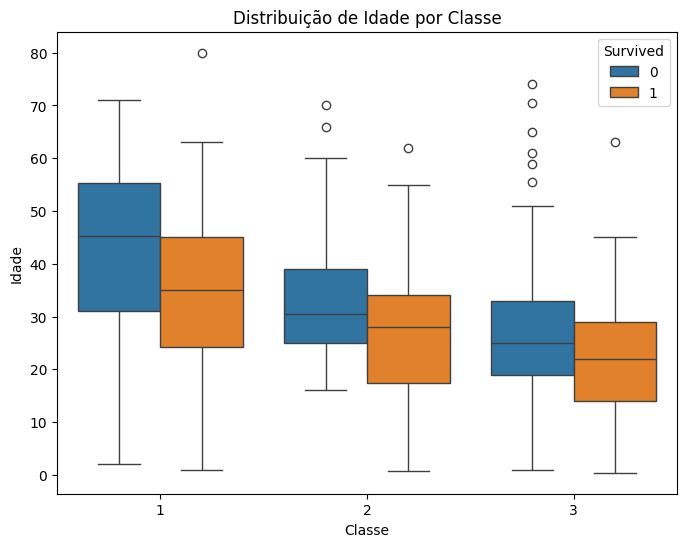

In [13]:
# Boxplot para visualizar outliers na idade
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=df, hue="Survived")
plt.title("Distribuição de Idade por Classe")
plt.xlabel("Classe")
plt.ylabel("Idade")
plt.show()

In [14]:
# Cálculo de medidas estatísticas
media_idade = df["Age"].mean()
mediana_idade = df["Age"].median()
moda_idade = df["Age"].mode()[0]

pd.DataFrame(
    [{"Média": media_idade, "Mediana": mediana_idade, "Moda": moda_idade}],
)

,Média,Mediana,Moda
0,29.699118,28.0,24.0


In [15]:
# Cálculo de medidas estatísticas
# SELECT Pclass, AVG(Age), MEDIAN(Age), STDDEV(Age) FROM df GROUP BY Pclass
gb = df.groupby("Pclass")["Age"].agg(["mean", "median", "std"])
gb

,mean,median,std
Pclass,,,
1,38.233441,37.0,14.802856
2,29.877630,29.0,14.001077
3,25.140620,24.0,12.495398


## 5. Análise Bivariada

A análise bivariada envolve a análise da relação entre duas variáveis. Vamos explorar a relação entre idade e tarifa, e calcular a correlação entre essas variáveis.


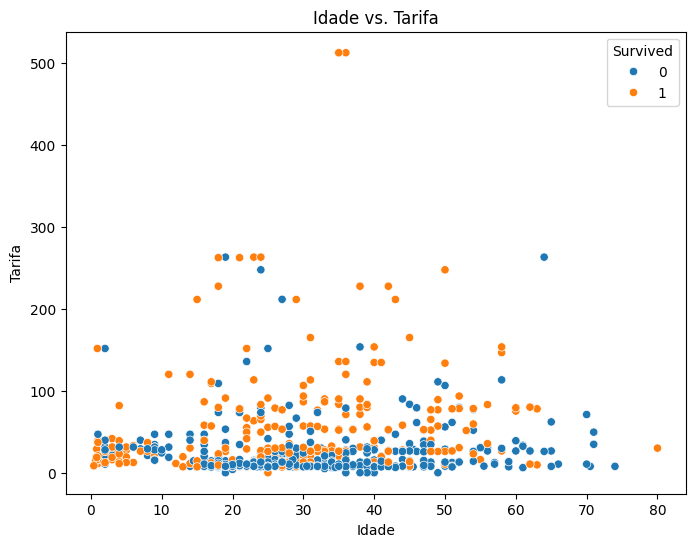

In [16]:
# Scatter plot entre Idade e Tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Idade vs. Tarifa")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()

In [17]:
# Cálculo de correlação
correlacao = df["Age"].corr(df["Fare"])
print(f"Correlação entre Idade e Tarifa: {correlacao:.2f}")

Correlação entre Idade e Tarifa: 0.10


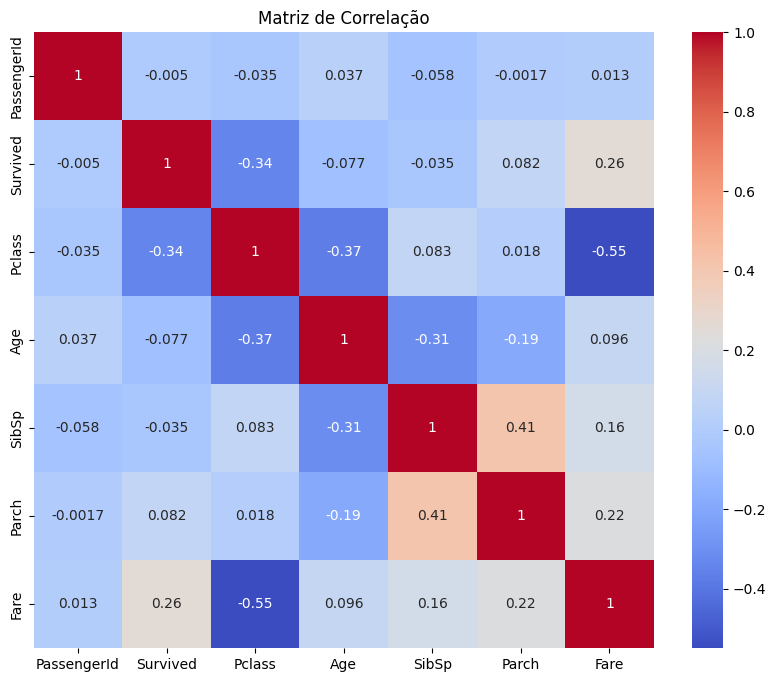

In [18]:
# Matriz de correlação com Heatmap
plt.figure(figsize=(10, 8))
correlacao_matriz = df.corr(numeric_only=True)
sns.heatmap(correlacao_matriz, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## 6. Análise Multivariada

A análise multivariada envolve a análise de mais de duas variáveis ao mesmo tempo. Vamos explorar interações entre múltiplas variáveis usando gráficos de pares.


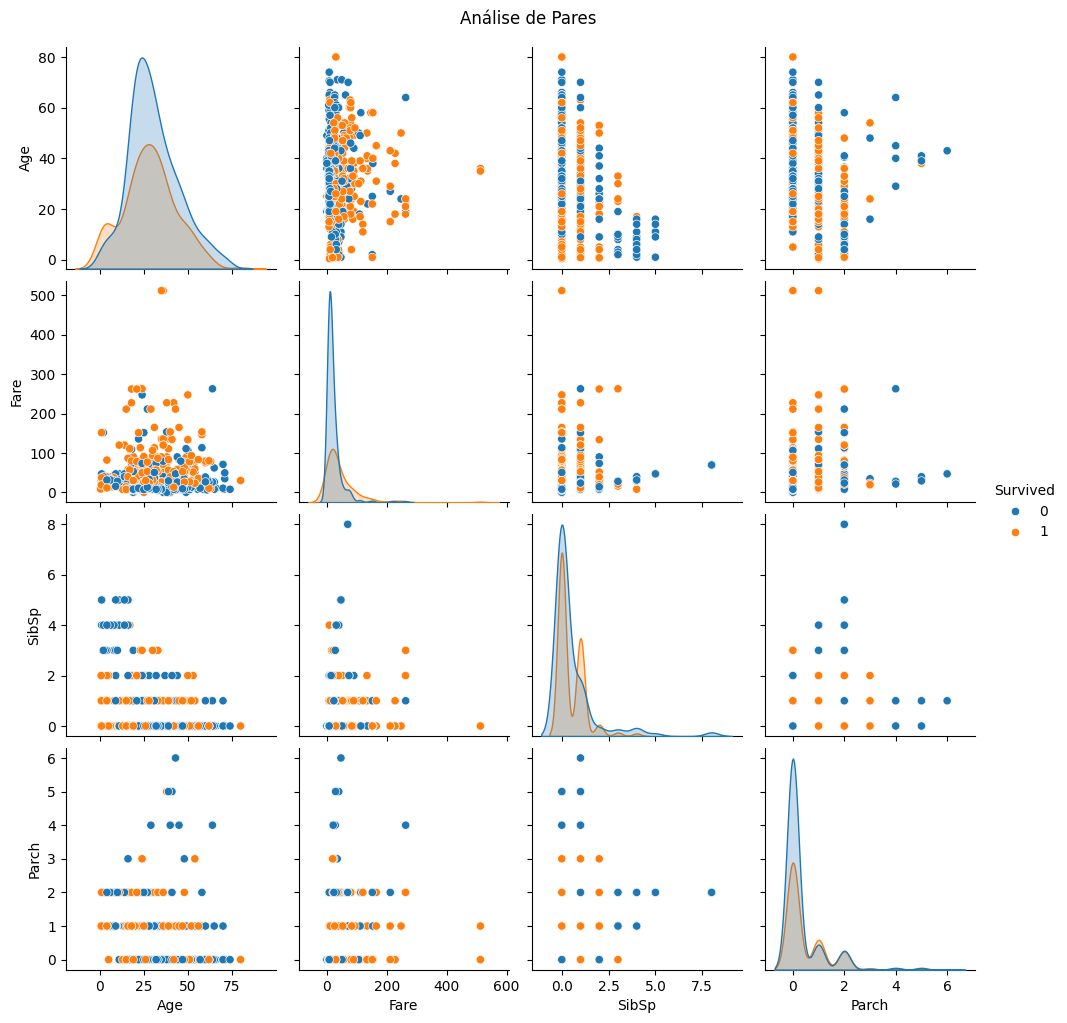

In [19]:
# Gráfico de pares (pairplot) com Seaborn
sns.pairplot(df, hue="Survived", vars=["Age", "Fare", "SibSp", "Parch"])
plt.suptitle("Análise de Pares", y=1.02)
plt.show()

## 7. Construção de um Modelo de Propensão

## Exemplos de Aplicações de um Modelo de Propensão



Um modelo de propensão como o treinado na base de dados do Titanic, que contém informações de passageiros como idade, sexo, classe de passagem, e se sobreviveram ou não, pode ser aplicado em várias situações práticas para demonstrar diferentes conceitos e técnicas de aprendizado de máquina, como:

### 1. Análise de Risco em Transportes
- **Objetivo**: Melhorar a segurança de passageiros em diferentes meios de transporte.
- **Aplicação**: Utilizar insights do modelo para identificar fatores que podem aumentar a probabilidade de sobrevivência em acidentes e aplicar esses insights para desenvolver melhores protocolos de segurança.

### 2. Seguros de Vida
- **Objetivo**: Calcular prêmios de seguro de vida.
- **Aplicação**: Usar o modelo para avaliar o risco de mortalidade com base em características dos passageiros, ajustando os prêmios de seguro de acordo com o risco estimado.

### 3. Serviços de Atendimento ao Cliente
- **Objetivo**: Melhorar a experiência do cliente.
- **Aplicação**: Identificar clientes mais propensos a cancelar serviços ou fazer reclamações, permitindo a implementação de medidas preventivas para aumentar a satisfação e retenção de clientes.

### 4. Marketing Direcionado
- **Objetivo**: Aumentar a eficiência das campanhas de marketing.
- **Aplicação**: Utilizar o modelo para identificar grupos de passageiros (clientes) com maior propensão a responder positivamente a campanhas promocionais ou novas ofertas.

### 5. Planejamento de Resgate em Desastres
- **Objetivo**: Melhorar os planos de resgate em desastres.
- **Aplicação**: Analisar os dados para identificar quais grupos de pessoas têm maior probabilidade de sobrevivência em diferentes cenários, ajudando a planejar operações de resgate mais eficazes.

### 6. Modelagem de Comportamento Humano
- **Objetivo**: Estudar o comportamento humano em situações de emergência.
- **Aplicação**: Utilizar os dados para entender como diferentes grupos de pessoas reagem em situações de emergência, informando políticas e treinamentos para melhorar as respostas a desastres.

Essas aplicações podem ser adaptadas para se adequar a diferentes contextos e setores, utilizando os princípios aprendidos com a análise da base de dados do Titanic para resolver problemas reais em diversas áreas.


### Definição do Problema

Queremos construir um modelo de propensão para prever a probabilidade de sobrevivência dos passageiros do Titanic.


### Preparação dos Dados

Antes de construir o modelo, precisamos preparar os dados, o que inclui a limpeza e a seleção de features relevantes.


In [20]:
# Seleção de features
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
df = df.dropna(
    subset=features
)  # Remover linhas com valores nulos nas features selecionadas

# y = a * x + b
X = df[features]
y = df["Survived"]

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Construção do Modelo

Vamos usar um classificador de regressão logística para construir o nosso modelo de propensão.


In [21]:
# Construção do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [22]:
result = pd.DataFrame(X_test).reset_index(drop=True)

result["Predicted"] = y_pred.tolist()
result["Actual"] = y_test.values
result["Probability"] = [f"{100*i:.2f}%" for i in y_pred_proba.tolist()]

result.head(10)

,Pclass,Age,SibSp,Parch,Fare,Predicted,Actual,Probability
0,2,42.0,0,0,13.0000,0,0,30.32%
1,2,3.0,1,1,18.7500,1,1,76.11%
2,2,29.0,1,0,26.0000,0,1,40.04%
3,1,24.0,0,0,69.3000,1,1,80.93%
4,3,43.0,0,0,6.4500,0,0,11.52%
5,2,8.0,1,1,36.7500,1,1,72.47%
6,3,33.0,3,0,15.8500,0,1,8.54%
7,2,54.0,1,3,23.0000,0,1,27.13%
8,3,28.0,0,0,7.8958,0,0,22.18%
9,3,23.0,0,0,7.9250,0,0,26.98%


### Avaliação do Modelo

Vamos avaliar o modelo usando métricas como Acurácia, Precisão, Recall, e AUC-ROC.


In [23]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 0.70
Precisão: 0.67
Recall: 0.46


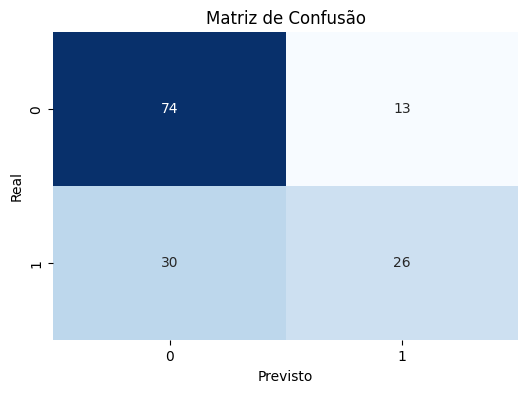

In [24]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## 8. Conclusão

### Resumo dos Principais Pontos

- A Análise Exploratória de Dados (AED) é essencial para entender a distribuição dos dados, identificar padrões, detectar outliers, e formular hipóteses.
- A modelagem de propensão pode ser usada para prever a probabilidade de um evento, como a sobrevivência dos passageiros do Titanic, utilizando técnicas de aprendizado de máquina.

### Sessão de Perguntas e Respostas

Agora é o momento de abrir para perguntas e esclarecer quaisquer dúvidas que você possa ter sobre os tópicos discutidos.


## Recursos Adicionais

- **Livros:**
  - *Python for Data Analysis* de Wes McKinney.
  - *Hands-On Exploratory Data Analysis with Python* de Suresh Kumar Mukhiya.
  - *An Introduction to Statistical Learning* de Gareth James et al.
  
- **Cursos Online:**
  - [Coursera](https://www.coursera.org/courses?query=exploratory%20data%20analysis)
  - [Kaggle](https://www.kaggle.com/learn/data-visualization)
  - [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

- **Tutoriais:**
  - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - [Scikit-learn Documentation](https://scikit-learn.org/stable/user_guide.html)
  - [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
